<a href="https://colab.research.google.com/github/Amin-Azar/DNNVis/blob/master/hashtable-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
#!pip install lshashpy3

from lshashpy3 import LSHash
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


(1, 16, 64, 112, 112)


In [115]:
def make_hash_table(channels, hash_size=10, num_hashtables=5):
  #k = 16 # hash size
  #L = 5  # number of tables
  shape = channels.shape
  d = images.shape[3] * images.shape[4] # Dimension of Feature vector
  lsh = LSHash(hash_size=hash_size, input_dim=d, num_hashtables=num_hashtables)

  # LSH on all the images
  for indx, im in enumerate(channels):
      im_f = im.flatten()
      lsh.index(im_f, extra_data=str(indx))
  return lsh

In [136]:
def get_similar_item(idx, channels, lsh_variable, n_items=5):
    cmap = 'viridis' # hot
    vmn=0 #-1/10*0.01
    vmx=1/10*7 #1/10*0.01

    if n_items == 'max':
      n_items=None
    else:
        n_items = n_items+1  
    response = lsh_variable.query(channels[idx].flatten(), 
                     num_results=n_items, distance_func='hamming')
    
    n_items = len(response)
    shape = channels.shape
    


    columns = 8
    rows = int(np.ceil(n_items/columns))
    fig=plt.figure(figsize=(columns*1.2, rows*1.2))
    for i in range(1, columns*rows +1):
        if i<n_items+1:
            ax = fig.add_subplot(rows, columns, i)
            if i ==1:
              ax.set_title('Query ID:'+str(idx))
            else:
              ax.set_title('Resp ID:' + str(response[i-1][0][1]))
            A = np.array(response[i-1][0][0])
            b = A.reshape(shape[1], shape[2])
            ax.imshow(b, cmap=cmap, interpolation=None, vmin=vmn, vmax=vmx)
    return plt.show()



In [117]:
images = np.load('/content/resnet18_dp-True_wt-0_ep-0_itt-0_layer-conv1_Conv2d_out_acts.npy')
print(images.shape)
channels = images[0,0,:,:,:]

(1, 16, 64, 112, 112)


HASH TABLE COUNT:10 BITS:10 | Query ID:15


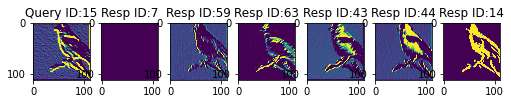

HASH TABLE COUNT:10 BITS:11 | Query ID:15


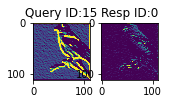

HASH TABLE COUNT:10 BITS:12 | Query ID:15


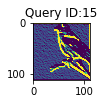

HASH TABLE COUNT:12 BITS:10 | Query ID:15


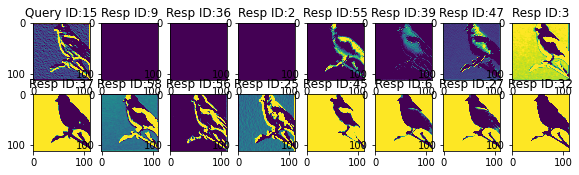

HASH TABLE COUNT:12 BITS:11 | Query ID:15


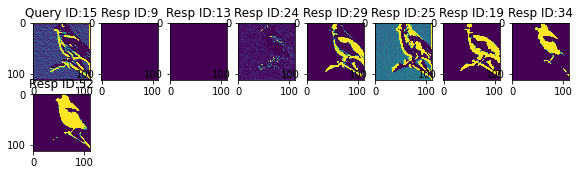

HASH TABLE COUNT:12 BITS:12 | Query ID:15


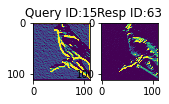

HASH TABLE COUNT:14 BITS:10 | Query ID:15


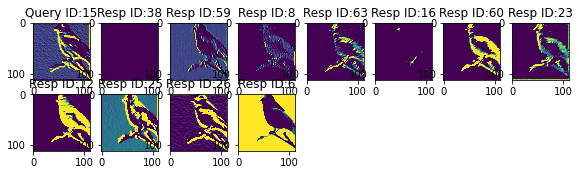

HASH TABLE COUNT:14 BITS:11 | Query ID:15


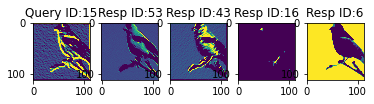

HASH TABLE COUNT:14 BITS:12 | Query ID:15


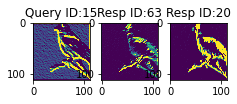

HASH TABLE COUNT:16 BITS:10 | Query ID:15


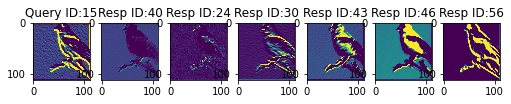

HASH TABLE COUNT:16 BITS:11 | Query ID:15


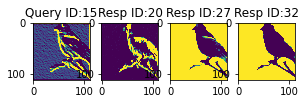

HASH TABLE COUNT:16 BITS:12 | Query ID:15


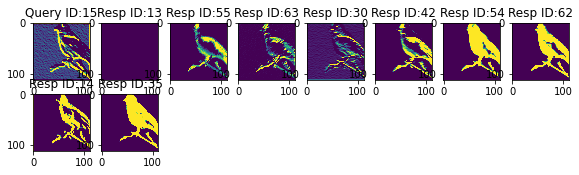

HASH TABLE COUNT:18 BITS:10 | Query ID:15


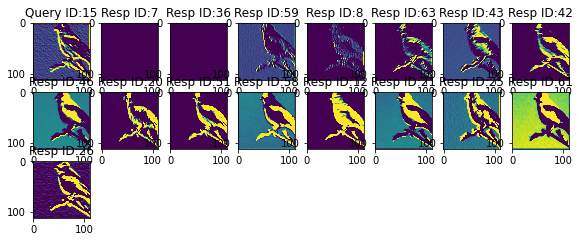

HASH TABLE COUNT:18 BITS:11 | Query ID:15


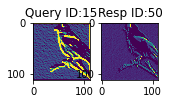

HASH TABLE COUNT:18 BITS:12 | Query ID:15


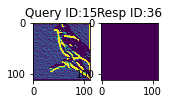

In [138]:
"""
  w/ ID:15:
    L: 5 tables was low
    K: 13 bits starts to be a lot  
"""
for L in range (10,20,2):
  for K in range (10,13, 1):
    print("==============================================================================")
    print("HASH TABLE COUNT:" + str(L) + " BITS:" + str(K), end='')
    lsh = make_hash_table(channels, hash_size=K, num_hashtables=L)
    for id in [15]: #range (0, len(channels)):
      print(" | Query ID:" + str(id))
      get_similar_item(id, channels, lsh, 'max')